# Import

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os , sys
import utils
import pygwalker as pyg
# pd.set_option("display.max_columns",None)

In [3]:
raw_df = utils.import_dataset(filename='Food_Establishment_Inspection_Data',file_type='csv')

/home/rahmani/work/ali/ML/source/ml_basic_p1/utils.py:15: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_type(f"{folder_name}/{filename}.{file_type}", **kwargs)


# Data Wrangling

In [4]:
cols = { k:k.replace(' ','_').lower() for k in raw_df.keys()}
cols
pre_df = raw_df.rename(columns=cols)

In [5]:
# pre_df = pre_df.dropna()

In [6]:
pre_df.city=pre_df.city.str.upper()

In [7]:
pre_df.drop(['program_identifier','inspection_business_name','inspection_serial_num','violation_record_id','business_id'], axis=1,inplace=True);

In [8]:
pre_df["inspection_date"]=pd.to_datetime(pre_df["inspection_date"])

pre_df['weekday'] = pre_df.inspection_date.dt.day_name()


In [9]:
# Fix wrong longitude 
pre_df.loc[pre_df['longitude'] > 122, 'longitude'] *=-1

In [10]:

not_valid_inspection_result_rows=pre_df[(pre_df.inspection_result !='Unsatisfactory') & (pre_df.inspection_result !='Complete') &
(pre_df.inspection_result !='Incomplete') & (pre_df.inspection_result !='Satisfactory')
]
pre_df.drop(not_valid_inspection_result_rows.index, inplace=True)


In [11]:
pre_df['name'] = pre_df.name.str.strip()

In [12]:
df = pre_df.reindex()

In [13]:
uniques = {}
uniques_count={}
df.apply(
    (
        lambda x: (uniques.update(
            {x.name:x.unique()}
        ),
          uniques_count.update(
              {x.name:len(x.unique())} 
          ))
    ),
    axis=0)
df_uniques = pd.DataFrame.from_dict(uniques_count, orient='index', columns=['Count'])
df_uniques = df_uniques.sort_values(by='Count', ascending=False)
df_uniques

,Count
address,9520
name,9295
latitude,9218
longitude,9213
phone,6928
inspection_date,5199
zip_code,183
violation_description,148
inspection_score,141
city,55


In [14]:
# df[['description',"violation_description","inspection_closed_business"]]

In [15]:
# df['violation_description'].unique() 

In [16]:
# df[df['violation_description'] == 'Proper hot holding temperatures (less than 130 degrees F )']

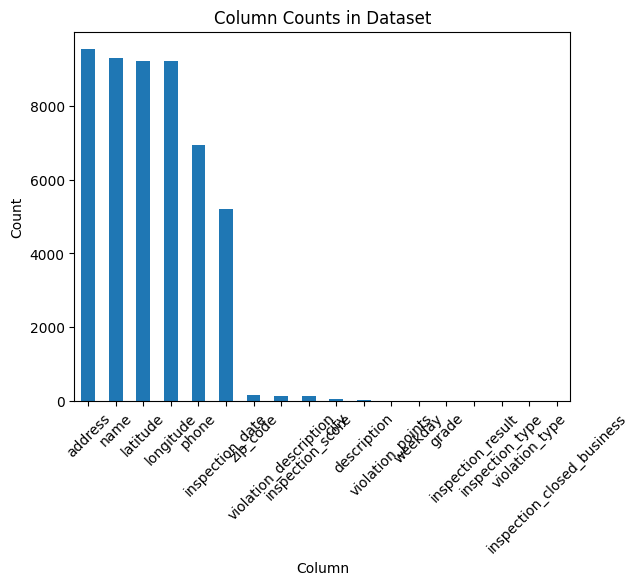

In [17]:
df_uniques = pd.DataFrame.from_dict(uniques_count, orient='index', columns=['Count'])

# Sort the DataFrame by count in descending order
df_uniques = df_uniques.sort_values(by='Count', ascending=False)
df_uniques
# Create the bar plot
ax = df_uniques.plot(kind='bar', legend=False)

# Set the axis labels and title
ax.set_xlabel('Column')
ax.set_ylabel('Count')
ax.set_title('Column Counts in Dataset')

# # Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# # Display the plot
plt.show()


# Featurs

## Weekday 

<Axes: title={'center': 'Inspection times on weekdays'}, xlabel='weekday', ylabel='count'>

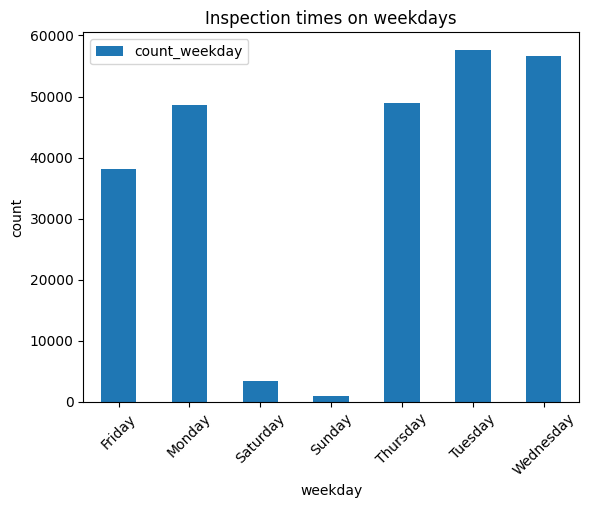

In [18]:
m = df.groupby('weekday').agg(count_weekday=('weekday','count'))
m.plot(kind='bar',
       # figsize=(5,2),
       xlabel='weekday',
       ylabel='count',
       rot=45, # rotate x label 
       # table=True, xlim=300, logy=True,
       title='Inspection times on weekdays',
      )

<Axes: title={'center': 'Inspection times on weekdays '}, ylabel='count_weekday'>

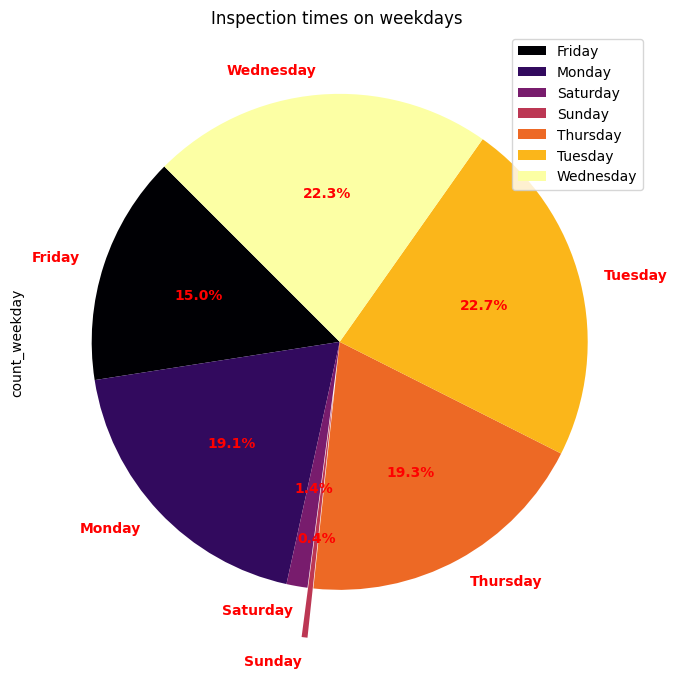

In [19]:
explode = (0.0, 0.0, 0.0, 0.2, 0.0, 0.0,0.0)
ax = m.plot(kind='pie', y='count_weekday',
       figsize=(8,15),
       colormap='inferno',
       explode = explode,
       # shadow=True,
       autopct='%1.1f%%',
       startangle=135,
       # hatch=['**', 'oO', 'O.O', '.||.', '/', '\\', '.'],
       title='Inspection times on weekdays ',

      )

from matplotlib.font_manager import FontProperties
font_props = FontProperties(weight='bold',)
for text in ax.texts:
    text.set_color('red')
    text.set_fontproperties(font_props)
ax

<Axes: title={'center': 'days'}, xlabel='inspection_date'>

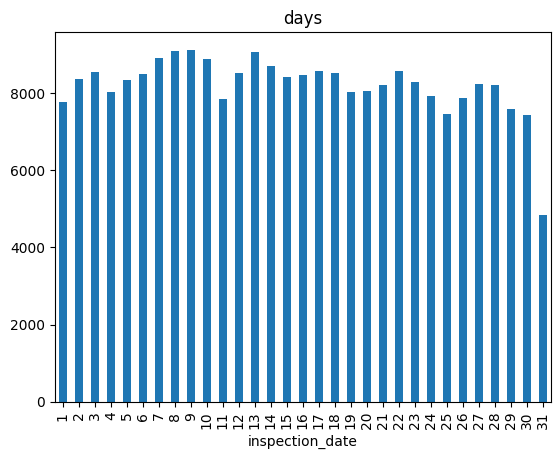

In [20]:
days_freq_gp = df.groupby([ df.inspection_date.dt.day]).agg('size')
days_freq_gp.plot(kind='bar', title="days")

<Axes: title={'center': 'months'}, xlabel='inspection_date'>

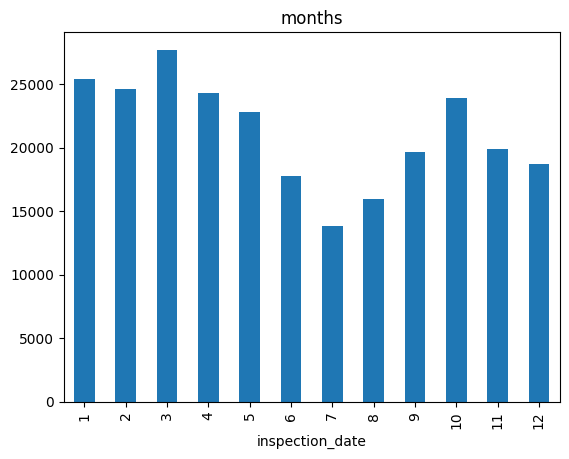

In [21]:
months_freq_gp = df.groupby([ df.inspection_date.dt.month]).agg('size')
months_freq_gp.plot(kind='bar', title="months")

<Axes: title={'center': 'years'}, xlabel='inspection_date'>

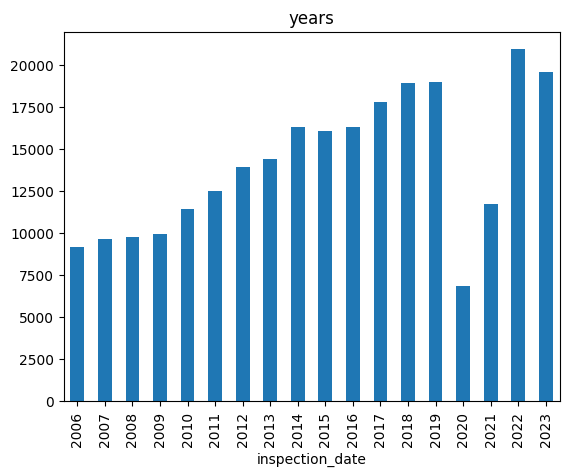

In [22]:
years_freq_gp = df.groupby([ df.inspection_date.dt.year]).agg('size')
years_freq_gp.plot(kind='bar', title="years")

<Axes: title={'center': 'years_months'}, xlabel='inspection_date,inspection_date'>

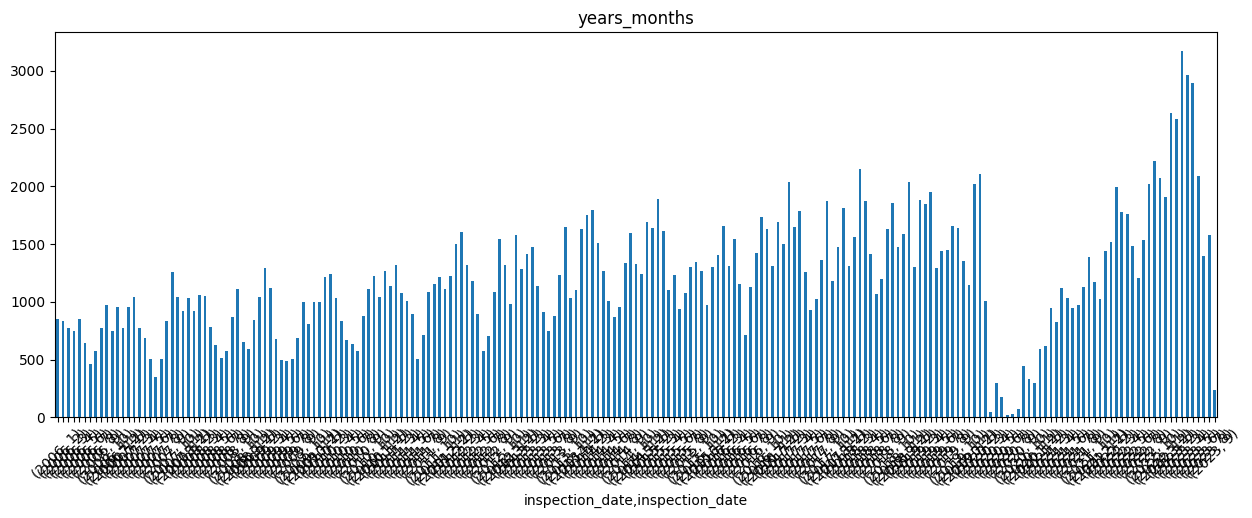

In [23]:
years_months_freq_gp = df.groupby([df.inspection_date.dt.year,df.inspection_date.dt.month]).agg('size')
years_months_freq_gp.plot(kind='bar', title="years_months", figsize=(15,5), legend=False, rot=45)

## Most City-Store violations 

In [24]:
pd.pivot_table(df,index=['city','name','grade'],columns=['violation_type'],aggfunc='size')

violation_type                                       BLUE   RED
city        name                              grade            
ALGONA      COCO JOE'S                        1.0    56.0  37.0
            TACOS EL TAJIN                    1.0     NaN   1.0
AUBURN      7-ELEVEN # 38940                  3.0     NaN  10.0
            7-ELEVEN #27219C                  2.0     3.0   5.0
            7-ELEVEN #35333B                  2.0    11.0  16.0
...                                                   ...   ...
WOODINVILLE WOODIN CREEK KITCHEN & TAP        1.0     NaN   1.0
            WOODINVILLE BAGEL BAKERY          2.0     2.0   7.0
            WOODINVILLE CAFE                  1.0     6.0  17.0
            WOODINVILLE CUT SHOP              1.0     3.0   4.0
            Walla Walla Steak Co- Woodinville 2.0     NaN   1.0

[6752 rows x 2 columns]

In [25]:
df_plot = df[['name','city','grade',]]
df_plot

,name,city,grade
0,#807 TUTTA BELLA,SEATTLE,1.0
1,#807 TUTTA BELLA,SEATTLE,1.0
2,#807 TUTTA BELLA,SEATTLE,1.0
3,#807 TUTTA BELLA,SEATTLE,1.0
4,#807 TUTTA BELLA,SEATTLE,1.0
...,...,...,...
255577,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,SEATTLE,2.0
255578,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,SEATTLE,2.0
255579,ZZ DESSERT,KENT,1.0
255580,ZZ DESSERT,KENT,1.0


## Map

<Axes: >

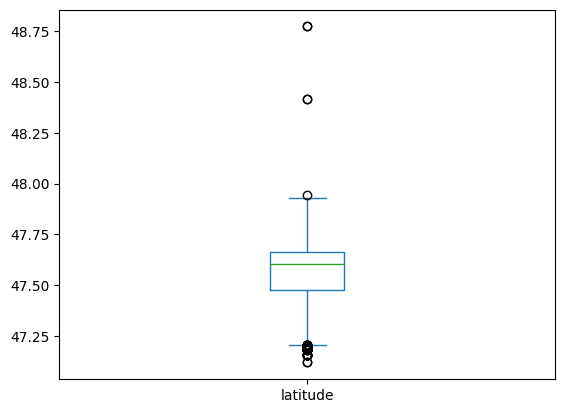

In [26]:
# Before remove outlier
df.latitude.plot(kind='box')

<Axes: >

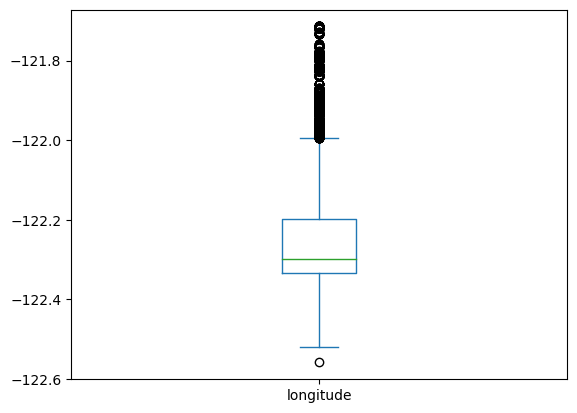

In [27]:
# Calculate the first quartile (Q1) and third quartile (Q3)
q1 = df[['latitude', 'longitude']].quantile(0.01)
q3 = df[['latitude', 'longitude']].quantile(0.90)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out rows that fall outside the acceptable range
df2 = df[((df[['latitude', 'longitude']] >= lower_bound) & (df[['latitude', 'longitude']] <= upper_bound)).all(axis=1)]

# After remove outlier
df2.longitude.plot(kind='box')

In [28]:
df3=df2.copy()

lat_bins = np.arange(df3.latitude.min(), df3.latitude.max(), 0.1)
lon_bins = np.arange(df3.longitude.min(), df3.longitude.max(), 0.1)

# Create bins for latitude and longitude
df3['latitude_bin'] = pd.cut(df3['latitude'], lat_bins)
df3['longitude_bin'] = pd.cut(df3['longitude'], lon_bins)

# Perform aggregation on the bins
agg_df = df3.groupby(['latitude_bin', 'longitude_bin']).agg('size').reset_index().rename(columns={0: '_size'})
agg_df

,latitude_bin,longitude_bin,_size
0,"(47.121, 47.221]","(-122.559, -122.459]",0
1,"(47.121, 47.221]","(-122.459, -122.359]",18
2,"(47.121, 47.221]","(-122.359, -122.259]",4
3,"(47.121, 47.221]","(-122.259, -122.159]",0
4,"(47.121, 47.221]","(-122.159, -122.059]",46
...,...,...,...
59,"(47.821, 47.921]","(-122.259, -122.159]",30
60,"(47.821, 47.921]","(-122.159, -122.059]",6
61,"(47.821, 47.921]","(-122.059, -121.959]",2
62,"(47.821, 47.921]","(-121.959, -121.859]",0


In [29]:
df4 = df3.copy()
df4 = df4.groupby(['latitude_bin', 'longitude_bin','inspection_result']).agg('size').reset_index().rename(columns={0: '_size'}).sort_values(
    ['latitude_bin', 'longitude_bin','_size'], ascending=False)
df4.describe()
df4[df4._size>0].describe()
df4[df4._size>0]
df4.latitude_bin.dtype
# df4.latitude_bin


CategoricalDtype(categories=[(47.121, 47.221], (47.221, 47.321], (47.321, 47.421], (47.421, 47.521], (47.521, 47.621], (47.621, 47.721], (47.721, 47.821], (47.821, 47.921]], ordered=True)

In [30]:

utils.save_report(df=df4, 
                  reports_folder='reports', 
                  file_type='csv', 
                  filename='lat_lon_inspection_result_size',)
# df4.to_csv('reports/lat_lon_inspection_result_size.csv')

In [31]:
z=df.dropna(subset=['inspection_date'])
z=z[['inspection_date','violation_description','violation_type']].sort_values('inspection_date').tail(50)
z

,inspection_date,violation_description,violation_type
181036,2023-09-08,"4400 - Plumbing properly sized, installed,...",BLUE
181040,2023-09-08,2120 - Proper cold holding temperatures ( 42 d...,RED
238442,2023-09-08,2110 - Proper cold holding temperatures (great...,RED
87247,2023-09-08,3000 - Proper thawing methods used,BLUE
251885,2023-09-08,NaN,NaN
234464,2023-09-08,"3600 - Proper eating, tasting, drinking, or to...",BLUE
36006,2023-09-08,NaN,NaN
80150,2023-09-08,0600 - Adequate handwashing facilities,RED
212550,2023-09-08,NaN,NaN
251878,2023-09-08,NaN,NaN


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 254335 entries, 0 to 255581
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   name                        254335 non-null  object        
 1   inspection_date             254335 non-null  datetime64[ns]
 2   description                 254335 non-null  object        
 3   address                     254335 non-null  object        
 4   city                        254335 non-null  object        
 5   zip_code                    254335 non-null  object        
 6   phone                       183762 non-null  object        
 7   longitude                   254142 non-null  float64       
 8   latitude                    254142 non-null  float64       
 9   inspection_type             254335 non-null  object        
 10  inspection_score            254296 non-null  float64       
 11  inspection_result           254335 non-null 

In [33]:
df[(df['inspection_closed_business']==True) & (df['inspection_score']==180)].__len__() #.describe() # & (df['inspection_result']!='Unsatisfactory')] #['inspection_result'].describe()

18

In [34]:
df[df.name=='THAAL GRAND INDIAN PLATTER']

,name,inspection_date,description,address,city,zip_code,phone,longitude,latitude,inspection_type,inspection_score,inspection_result,inspection_closed_business,violation_type,violation_description,violation_points,grade,weekday
229731,THAAL GRAND INDIAN PLATTER,2023-06-20,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Return Inspection,52.0,Unsatisfactory,False,BLUE,"4400 - Plumbing properly sized, installed,...",5,4.0,Tuesday
229732,THAAL GRAND INDIAN PLATTER,2023-06-20,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Return Inspection,52.0,Unsatisfactory,False,BLUE,5000 - Posting of permit; mobile establishment...,2,4.0,Tuesday
229733,THAAL GRAND INDIAN PLATTER,2023-06-20,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Return Inspection,52.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,4.0,Tuesday
229734,THAAL GRAND INDIAN PLATTER,2023-06-20,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Return Inspection,52.0,Unsatisfactory,False,RED,1600 - Proper cooling procedure,25,4.0,Tuesday
229735,THAAL GRAND INDIAN PLATTER,2023-06-20,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Return Inspection,52.0,Unsatisfactory,False,RED,"0100 - PIC present, demonstrates knowledge and...",5,4.0,Tuesday
229736,THAAL GRAND INDIAN PLATTER,2023-06-20,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Return Inspection,52.0,Unsatisfactory,False,RED,2110 - Proper cold holding temperatures (great...,10,4.0,Tuesday
229737,THAAL GRAND INDIAN PLATTER,2023-06-13,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Routine Inspection/Field Review,180.0,Unsatisfactory,True,BLUE,"4200 - Food-contact surfaces maintained, clean...",5,4.0,Tuesday
229738,THAAL GRAND INDIAN PLATTER,2023-06-13,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Routine Inspection/Field Review,180.0,Unsatisfactory,True,BLUE,"4400 - Plumbing properly sized, installed,...",5,4.0,Tuesday
229739,THAAL GRAND INDIAN PLATTER,2023-06-13,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Routine Inspection/Field Review,180.0,Unsatisfactory,True,BLUE,2800 - Food received at proper temperature,5,4.0,Tuesday
229740,THAAL GRAND INDIAN PLATTER,2023-06-13,Seating 51-150 - Risk Category III,15600 NE 8TH ST 0-9,BELLEVUE,98008,(608) 718-9491,-122.131688,47.621472,Routine Inspection/Field Review,180.0,Unsatisfactory,True,BLUE,3300 - Potential food contamination prevented ...,5,4.0,Tuesday


In [35]:
df[(df['inspection_closed_business']==False)].describe()

,inspection_date,longitude,latitude,inspection_score,violation_points,grade
count,253547,253354.000000,253354.000000,253508.000000,253547.000000,192546.000000
mean,2015-11-23 08:00:01.135884288,-122.255824,47.563599,13.859661,4.390492,1.416555
min,2006-01-02 00:00:00,-122.558512,47.120956,-2.000000,0.000000,1.000000
25%,2012-01-26 00:00:00,-122.333595,47.479313,0.000000,0.000000,1.000000
50%,2016-03-23 00:00:00,-122.299200,47.602489,5.000000,3.000000,1.000000
75%,2019-09-20 00:00:00,-122.197717,47.661462,20.000000,5.000000,2.000000
max,2023-09-08 00:00:00,-121.090900,48.772284,149.000000,30.000000,4.000000
std,NaN,0.114429,0.128512,19.600866,6.095386,0.615069


In [36]:
g = df[(df['inspection_closed_business']==True) ] #& (df['inspection_score']>=100)]
g1=g.groupby(['name','inspection_date']).agg(
    count_=('description','count'),
    grad_=('grade','last'),
    inspection_result_=('inspection_result','last'),
    inspection_score_=('inspection_score','last'),
    violation_description_=('violation_description','last'),
    violation_type_=('violation_type','last'),
)

g1.head(100)

g1[(g1.inspection_result_!='Unsatisfactory') & (g1.inspection_result_!='Satisfactory') ] 



,,count_,grad_,inspection_result_,inspection_score_,violation_description_,violation_type_
name,inspection_date,,,,,,
CHINESE SAUERKRAUT FISH,2022-04-21,1,2.0,Complete,0.0,None,None
CHOPSTICKS CUISINE,2023-05-01,1,4.0,Complete,10.0,0600 - Adequate handwashing facilities,RED
KING BUFFET,2013-12-12,14,1.0,Complete,178.0,0900 - Proper washing of fruits and vegetables,RED
MCDONALD'S RESTAURANT 0459,2019-04-15,1,1.0,Complete,0.0,None,None
QUARTER CHUTE CAFE,2008-08-29,1,1.0,Complete,0.0,None,None
THAI BISTRO RESTAURANT,2015-11-05,1,2.0,Complete,0.0,None,None
TOSHI'S TERIYAKI,2014-11-06,1,1.0,Complete,0.0,None,None
TUTTA BELLA NEAPOLITAN PIZZARI,2022-12-14,1,1.0,Complete,15.0,"0800 - Water supply, ice from approved source",RED


In [37]:

g1[(g1.inspection_result_=='Unsatisfactory') | (g1.inspection_result_=='Satisfactory') ] 


,,count_,grad_,inspection_result_,inspection_score_,violation_description_,violation_type_
name,inspection_date,,,,,,
13 COINS,2014-04-28,6,1.0,Unsatisfactory,100.0,2110 - Proper cold holding temperatures (great...,RED
7-ELEVEN STORE #2361-27283C,2014-10-13,1,2.0,Unsatisfactory,0.0,None,None
AL'S GOURMET SAUSAGE #5,2006-06-08,2,NaN,Unsatisfactory,12.0,Adequate handwashing facilities,RED
ART MARBLE 21,2016-11-25,1,1.0,Unsatisfactory,10.0,2110 - Proper cold holding temperatures (great...,RED
ASIA BBQ & FAST FOOD,2015-07-27,9,2.0,Unsatisfactory,125.0,1300 - Food contact surfaces and utensils used...,RED
...,...,...,...,...,...,...,...
WALAALAHA MINI MARKET,2023-01-25,8,2.0,Unsatisfactory,95.0,1710 - Proper hot holding temperatures (less t...,RED
WET MEX,2022-02-01,2,NaN,Unsatisfactory,15.0,0600 - Adequate handwashing facilities,RED
YOKO 3,2016-07-11,13,1.0,Unsatisfactory,141.0,2110 - Proper cold holding temperatures (great...,RED


In [38]:
# g #.plot.box()

In [39]:
first_inspextion = df.groupby('name').agg('first').sort_values('inspection_date') #[df.grade >= 1]

In [40]:
#TODO: Why 'T-MOBILE PARK' repeate multi times
df.groupby(['name','inspection_date']).agg('count').sort_values('city',ascending=False)[:50]
# df[(df.name=='T-MOBILE PARK' )& ((df.inspection_date=='2006-08-29') | (df.inspection_date=='2010-05-2'))]

description  address  city  \
name                            inspection_date                               
T-MOBILE PARK                   2006-08-29                46       46    46   
                                2018-04-13                42       42    42   
ARENA AT SEATTLE CENTER         2023-04-08                35       35    35   
T-MOBILE PARK                   2023-05-06                35       35    35   
                                2010-05-20                34       34    34   
                                2008-08-06                34       34    34   
                                2011-04-13                34       34    34   
                                2019-04-02                32       32    32   
                                2022-07-07                30       30    30   
                                2023-07-08                30       30    30   
                                2009-05-05                30       30    30   
                                2006-06-08                29       29    29   
                                2009-06-25                28       28    28   
                                2023-07-11                27       27    27   
                                2022-07-02                27       27    27   
LEVY RESTAURANTS @ LUMEN FIELD  2021-11-21                25       25    25   
T-MOBILE PARK                   2021-04-07                24       24    24   
ACCESSO SHOWARE CENTER          2013-01-08                24       24    24   
T-MOBILE PARK                   2008-04-15                23       23    23   
LEVY RESTAURANTS @ LUMEN FIELD  2021-07-07                23       23    23   
T-MOBILE PARK                   2023-06-28                23       23    23   
                                2007-04-02                22       22    22   
MIDORI TERIYAKI                 2012-09-07                22       22    22   
T-MOBILE PARK                   2009-04-23                22       22    22   
                                2008-04-22                21       21    21   
STONE KOREAN RESTAURANT         2022-06-14                21       21    21   
T-MOBILE PARK                   2022-10-15                21       21    21   
                                2007-08-29                21       21    21   
                                2007-08-15                21       21    21   
                                2007-09-14                21       21    21   
99 RANCH MARKET                 2010-03-18                20       20    20   
SAIGON DELI                     2010-07-08                20       20    20   
T-MOBILE PARK                   2023-04-13                20       20    20   
ROYAL INDIA                     2006-05-10                20       20    20   
BOMBAY GRILL                    2022-03-08                19       19    19   
SAFEWAY INC #1508               2012-08-29                19       19    19   
T-MOBILE PARK                   2019-04-12                19       19    19   
LEVY RESTAURANTS @ LUMEN FIELD  2021-04-08                19       19    19   
T-MOBILE PARK                   2006-07-05                19       19    19   
EMERALD DOWNS                   2022-09-03                19       19    19   
T-MOBILE PARK                   2012-04-18                19       19    19   
                                2012-05-22                19       19    19   
ARENA AT SEATTLE CENTER         2022-04-09                19       19    19   
LEVY RESTAURANTS @ LUMEN FIELD  2022-06-04                19       19    19   
BOMBAY GRILL                    2023-02-08                18       18    18   
THAAL GRAND INDIAN PLATTER      2023-06-13                18       18    18   
LA HUERTA INTERNATIONAL  MARKET 2022-11-23                18       18    18   
ASIAN PACIFIC MARKET AND DELI   2021-06-16                18       18    18   
T-MOBILE PARK                   2012-10-03                18       18    18   
HAPPY AT THE BAY TER

In [41]:
# df[df.latitude.isnull()][:50]

In [42]:
df

,name,inspection_date,description,address,city,zip_code,phone,longitude,latitude,inspection_type,inspection_score,inspection_result,inspection_closed_business,violation_type,violation_description,violation_points,grade,weekday
0,#807 TUTTA BELLA,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,Routine Inspection/Field Review,20.0,Unsatisfactory,False,RED,1300 - Food contact surfaces cleaned and sanit...,15,1.0,Thursday
1,#807 TUTTA BELLA,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,Routine Inspection/Field Review,20.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,1.0,Thursday
2,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,1.0,Wednesday
3,#807 TUTTA BELLA,2022-08-31,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,1.0,Wednesday
4,#807 TUTTA BELLA,2022-01-13,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,NaN,NaN,0,1.0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255577,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2017-11-27,Seating 0-12 - Risk Category III,11752 15TH AVE NE,SEATTLE,98125,(415) 385-1379,-122.312056,47.715359,Routine Inspection/Field Review,0.0,Satisfactory,False,NaN,NaN,0,2.0,Monday
255578,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,2017-09-06,Seating 0-12 - Risk Category III,11752 15TH AVE NE,SEATTLE,98125,(415) 385-1379,-122.312056,47.715359,Consultation/Education - Field,0.0,Complete,False,NaN,NaN,0,2.0,Wednesday
255579,ZZ DESSERT,2023-01-23,Seating 0-12 - Risk Category III,18230 E VALLEY HWY STE 178,KENT,98032,(206) 779-0528,-122.220420,47.438930,Routine Inspection/Field Review,10.0,Satisfactory,False,BLUE,"3400 - Wiping cloths properly used, stored, sa...",5,1.0,Monday
255580,ZZ DESSERT,2023-01-23,Seating 0-12 - Risk Category III,18230 E VALLEY HWY STE 178,KENT,98032,(206) 779-0528,-122.220420,47.438930,Routine Inspection/Field Review,10.0,Satisfactory,False,BLUE,"4400 - Plumbing properly sized, installed,...",5,1.0,Monday


<Axes: xlabel='city'>

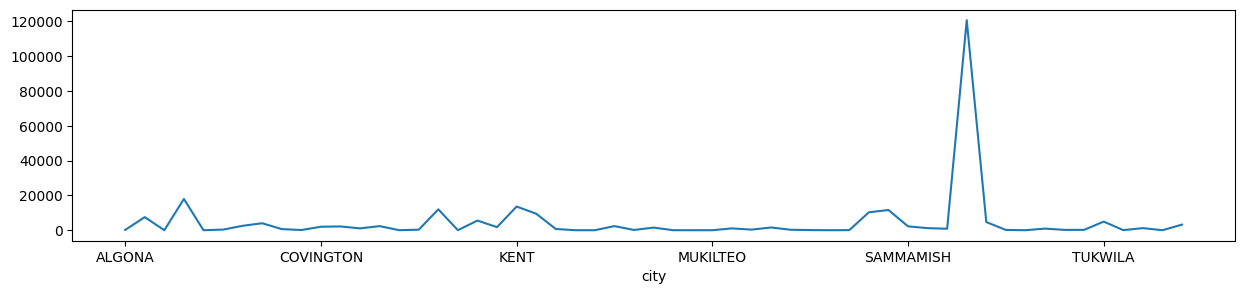

In [43]:
df.groupby('city').agg('size').plot.line(figsize=(15,3))

<Axes: >

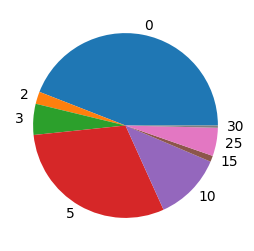

In [44]:
df.groupby('violation_points').agg('size').plot.pie(figsize=(15,3))

<Axes: xlabel='violation_points'>

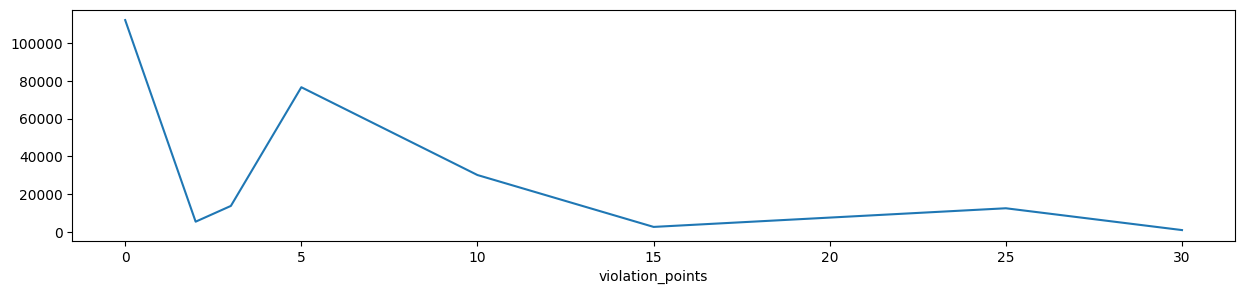

In [45]:
df.groupby('violation_points').agg('size').plot.line(figsize=(15,3))

In [46]:
inspect_desc = df.violation_description.unique()
inspect_desc_words=[]
inspect_desc_number=[]
for i in inspect_desc:
    if type(i) !=str:
        continue
    if i.startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')): # Use regex
        inspect_desc_number.append(i.split(' -')[0])
        inspect_desc_words.append(i)
# inspect_desc_number , inspect_desc_words

In [47]:
# df['violation_description_code'] =
def zxc(v):
    q=None
    if v is None:
        # print(None)
        q=None
    if type(v) == float:
        # print(v)
        q=v
    elif type(v) == str:
        # print('++++')
        q=v.split(' -')[0]
        if not q:

            for idw in inspect_desc_words:

                if v in idw:
                    print('++++++')
                    print(idw , v)
                    q = idw.split(' -')[0]
                    print('---',q)
        
    else: 
        q=v
        print(v)
    return q
# df['code'] = df['violation_description'].str.split(' - ').str.get(0).unique()
# df.code = df['violation_description'].

def fix(c):
    if type(c) != str:
        return False

    for b in inspect_desc_words:
        
        if c in b: 
            return b.split(' -')[0]
    return False
# df['code']= df.violation_description.map(fix) #.unique()
# df['code'] =df.violation_description.map(zxc) #.unique() #(lambda x: x.split('-')) #.str.split()[0]
# df.violation_description.unique()


In [48]:
# df[df['code'].isnull()]
# df['code'].unique()

In [49]:
df.code = df.violation_description.str.split(' -')

/tmp/ipykernel_13822/3270111951.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.code = df.violation_description.str.split(' -')


<Axes: xlabel='inspection_closed_business', ylabel='inspection_score'>

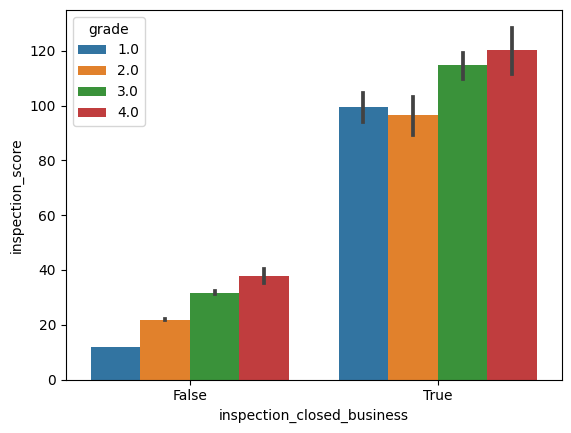

In [51]:
sns.barplot(x=df['inspection_closed_business'], y=df['inspection_score'],hue=df['grade'] )

In [56]:
df.head(2)

,name,inspection_date,description,address,city,zip_code,phone,longitude,latitude,inspection_type,inspection_score,inspection_result,inspection_closed_business,violation_type,violation_description,violation_points,grade,weekday
0,#807 TUTTA BELLA,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,Routine Inspection/Field Review,20.0,Unsatisfactory,False,RED,1300 - Food contact surfaces cleaned and sanit...,15,1.0,Thursday
1,#807 TUTTA BELLA,2023-03-02,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,Routine Inspection/Field Review,20.0,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,1.0,Thursday


In [52]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sklearn as sk
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels import graphics

import matplotlib.mlab as mlab
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [103]:

# df['datetime'] = df['timestamp'].map(lambda x: datetime.datetime.fromtimestamp(x))
# # Convert timestamp column to datetime format
# df['datetime'] = pd.to_datetime(df['datetime'])
# df_name_insp = df.groupby(['name','inspection_date','city']).agg(sum_violation_point=('violation_points','sum')).sort_values(['name','inspection_date','sum_violation_point']) #.reset_index()
df_name_insp = df.groupby(['city']).agg(sum_violation_point=('violation_points','sum')).sort_values(['sum_violation_point']) #.reset_index()
# df_name_insp.plot()
df_name_insp.count()
# df['price'] = df.apply(lambda x: (x.close if x.open > x.close else x.open),axis=1)

# # # Set timestamp column as index
# df_name_insp.set_index('inspection_date', inplace=True)

# # Plot the time series of Bitcoin prices
# plt.plot(df_name_insp.index, df_name_insp['sum_violation_point'])
# plt.xlabel('Date')
# plt.ylabel('Bitcoin Price')
# plt.title('Bitcoin Price Over 12 Months')


sum_violation_point    55
dtype: int64

In [104]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(result)
    p_value = result[1]
  
    if p_value < 0.05:
        return True 
    else:
        return False

# df_name_insp= df_name_insp[:100]
df_name_insp['diff'] = df_name_insp['sum_violation_point'].diff()
df_name_insp = df_name_insp[1:]
# df

is_stationary = check_stationarity(df_name_insp['diff'])
print("Is the differenced series stationary?", is_stationary)

(5.463001812267447, 1.0, 7, 46, {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}, 907.0744643076941)
Is the differenced series stationary? False


In [105]:
from statsmodels.tsa.arima.model import ARIMA
# Define values for p, d, and q
p = 1  # Order of autoregressive terms
d = 1 # Order of differencing
q = 1  # Order of moving average terms

# Fit the ARIMA model
model = ARIMA(df_name_insp['sum_violation_point'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     sum_violation_point   No. Observations:                   54
Model:                  ARIMA(1, 2, 1)   Log Likelihood                -637.411
Date:                 Fri, 20 Oct 2023   AIC                           1280.822
Time:                         11:33:17   BIC                           1286.676
Sample:                              0   HQIC                          1283.066
                                  - 54                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.136      7.363      0.000       0.734       1.266
ma.L1          0.4065      0.498      0.816      0.414      -0.570       1.383
sigma2      2.555e+09   1.59e-09   1.61e+18 

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored w

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/rahmani/work/envs/ML/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

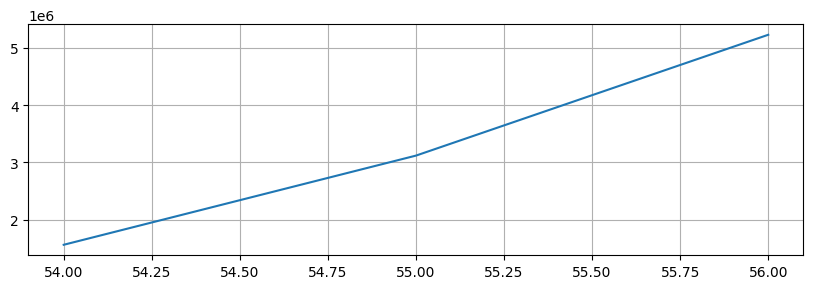

In [106]:
# Forecast the next 3 hours
forecast = model_fit.forecast(steps=3)
forecast.plot(figsize=(10,3),grid=True)
